In [4]:
import sys
print("Python:", sys.version)

import numpy as np
print("NumPy:", np.__version__)

import pandas as pd
print("Pandas:", pd.__version__)

import sklearn
print("Scikit-learn:", sklearn.__version__)

import spacy
print("SpaCy:", spacy.__version__)

Python: 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
NumPy: 1.16.4
Pandas: 0.25.3
Scikit-learn: 0.23.2
SpaCy: 2.3.4


## Read the SMS Spam Collections dataset

In [5]:
df = pd.read_csv('SMSSpamCollection.txt', sep='\t',names= ['y', 'x'])
df.head()

,y,x
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.describe()

,y,x
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


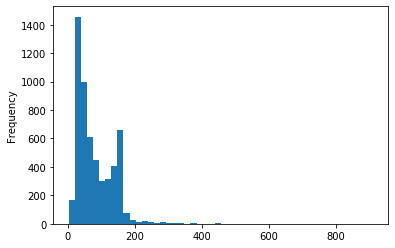

In [7]:
df['x'].apply(len).plot(bins=50, kind='hist') 

## Tokenize and POS-tag the input texts with spaCy

In [26]:
#!python3 -m spacy download en
nlp = spacy.load("en")

In [27]:
# Tokenization
df['tokens'] = df['x'].apply(nlp)

In [28]:
df.head()

,y,x,tokens,pos
0,ham,"Go until jurong point, crazy.. Available only ...","(Go, until, jurong, point, ,, crazy, .., Avail...","[VERB, ADP, ADJ, NOUN, PUNCT, ADJ, PUNCT, ADJ,..."
1,ham,Ok lar... Joking wif u oni...,"(Ok, lar, ..., Joking, wif, u, oni, ...)","[INTJ, NOUN, PUNCT, NOUN, CCONJ, PROPN, PROPN,..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"(Free, entry, in, 2, a, wkly, comp, to, win, F...","[ADJ, NOUN, ADP, NUM, DET, NOUN, NOUN, PART, V..."
3,ham,U dun say so early hor... U c already then say...,"(U, dun, say, so, early, hor, ..., U, c, alrea...","[PROPN, PROPN, VERB, ADV, ADJ, NOUN, PUNCT, PR..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","(Nah, I, do, n't, think, he, goes, to, usf, ,,...","[INTJ, PRON, AUX, PART, VERB, PRON, VERB, ADP,..."


In [29]:
# POS-tag
df['pos'] = df['tokens'].apply(lambda x: [i.pos_ for i in x])

In [30]:
df.head()

,y,x,tokens,pos
0,ham,"Go until jurong point, crazy.. Available only ...","(Go, until, jurong, point, ,, crazy, .., Avail...","[VERB, ADP, ADJ, NOUN, PUNCT, ADJ, PUNCT, ADJ,..."
1,ham,Ok lar... Joking wif u oni...,"(Ok, lar, ..., Joking, wif, u, oni, ...)","[INTJ, NOUN, PUNCT, NOUN, CCONJ, PROPN, PROPN,..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"(Free, entry, in, 2, a, wkly, comp, to, win, F...","[ADJ, NOUN, ADP, NUM, DET, NOUN, NOUN, PART, V..."
3,ham,U dun say so early hor... U c already then say...,"(U, dun, say, so, early, hor, ..., U, c, alrea...","[PROPN, PROPN, VERB, ADV, ADJ, NOUN, PUNCT, PR..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","(Nah, I, do, n't, think, he, goes, to, usf, ,,...","[INTJ, PRON, AUX, PART, VERB, PRON, VERB, ADP,..."


## Do POS-tag based and list-based stop-word filtering using ​ spaCy​ .

### stop word filtering

In [43]:
def filter_stop_worlds(tokens):
    filtered_tokens = []
    for t in tokens:
        if not t.is_stop:
            filtered_tokens.append(t)
    return ' '.join([str(x) for x in filtered_tokens])

In [44]:
stop_filtered = df['tokens'].apply(lambda x: filter_stop_worlds(x))
stop_filtered

0       jurong point , crazy .. Available bugis n grea...
1                         Ok lar ... Joking wif u oni ...
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                             U dun early hor ... U c ...
4                              Nah think goes usf , lives
                              ...                        
5567    2nd time tried 2 contact u. U won £ 750 Pound ...
5568                        ü b going esplanade fr home ?
5569                    Pity , * mood . ... suggestions ?
5570    guy bitching acted like interested buying week...
5571                                          Rofl . true
Name: tokens, Length: 5572, dtype: object

## Build and train 3 classical ML-based classifiers on TF-IDF BOW

### With text

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(stop_filtered)
y = df['y']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [48]:
print(X_train.shape)
print(y_train.shape)

(4457, 8523)
(4457,)


In [49]:
# SVM
from sklearn import svm
svc = svm.LinearSVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9820627802690582

In [57]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
gnb.score(X_test.toarray(), y_test)

0.8887892376681614

In [59]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9775784753363229

### With lemma

In [66]:
def filter_stopwords_and_get_lemma(tokens):
    filtered_tokens = []
    for t in tokens:
        if not t.is_stop:
            filtered_tokens.append(t.lemma)
    return ' '.join([str(x) for x in filtered_tokens])

In [74]:
filter_stopwords_and_get_lemma(df['tokens'][0])

'14096818269429646414 15479733260938818482 2593208677638477497 16792598155547231470 8848021949395737739 4887332976578131782 3557720637082594454 13210364986222294696 8881679497796027013 1703489418272052182 6804705863737483857 1720370409040345145 9503240487077079950 10875615029400813363 3040539950272399101 2013399242189103424 15198862986666964157 8445541832527975875 10875615029400813363'

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=filter_stopwords_and_get_lemma)
X = vectorizer.fit_transform(df['tokens'])
y = df['y']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [70]:
# SVM
from sklearn import svm
svc = svm.LinearSVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.8663677130044843

In [71]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
gnb.score(X_test.toarray(), y_test)

0.7614349775784753

In [72]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9013452914798207

In [82]:
print(
"""
                                   Results
                     With text                With lemma
SVM               0.9820627802690582      0.8663677130044843
Naive Bayes       0.8887892376681614      0.7614349775784753
Random Forest     0.9775784753363229      0.9013452914798207
""")


                                   Results
                     With text                With lemma
SVM               0.9820627802690582      0.8663677130044843
Naive Bayes       0.8887892376681614      0.7614349775784753
Random Forest     0.9775784753363229      0.9013452914798207

